#### In the notebook below we do SHAP analysis to understand the impact of the individual features on credit quality and credit growth

In [188]:
import shap
import pandas as pd
import numpy as np
shap.initjs()


In [229]:
import matplotlib.pyplot as plt

In [230]:
df = pd.read_csv('data/Master_data.csv')

In [231]:
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,date,year,month,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,...,Qtr,Mortgage,HE Revolving,Auto Loan,Credit Card,Student Loan,Other,Total,credit_yoy_6m,credit_yoy_12m
0,0,0,0,2003-01-01,2003,January,289412000.0,5.8,NaN,2.597403,...,03:Q1,4.942,0.242,0.641,0.688,0.2407,0.4776,7.2313,5.195193,5.379730
1,1,1,1,2003-02-01,2003,February,289606000.0,5.9,NaN,2.980877,...,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839,5.255735,5.124623
2,2,2,2,2003-03-01,2003,March,289809000.0,5.9,NaN,3.020134,...,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839,5.537326,5.396815
3,3,3,3,2003-04-01,2003,April,290024000.0,6.0,NaN,2.224694,...,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839,5.566037,4.830131
4,4,4,4,2003-05-01,2003,May,290250000.0,6.1,NaN,2.057842,...,03:Q3,5.183,0.269,0.684,0.693,0.2488,0.4773,7.5551,5.167455,4.545574


In [232]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [233]:
features = ['cpi_yoy', 'shelter_yoy', 'medical_care_yoy', 'food_yoy', 'gasoline_yoy', 'hourly_earnings_yoy', 'unemployment_rate', 'Mortgage_servicing_yoy', 'cc_payments_yoy']

X = df[108:235][features]
y = df[108:235]['cc_bals_30d_due_percentage_12m']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [234]:
explainer = shap.Explainer(model)

In [235]:
shap_values = explainer.shap_values(X_test)

In [236]:
shap_values[0]

array([ 0.02843219,  0.04129293, -0.01299559, -0.00021512,  0.03734024,
       -0.08817287,  0.00895028,  0.02453165,  0.09251811])

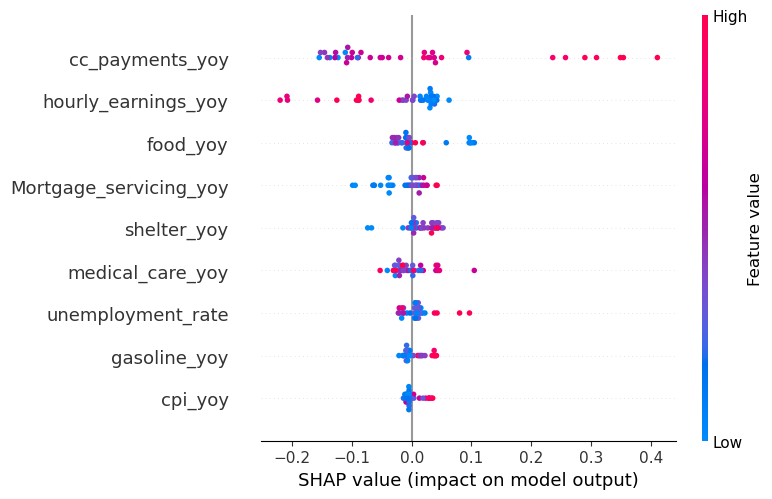

In [239]:
shap.summary_plot(shap_values, X_test)



<Figure size 640x480 with 0 Axes>

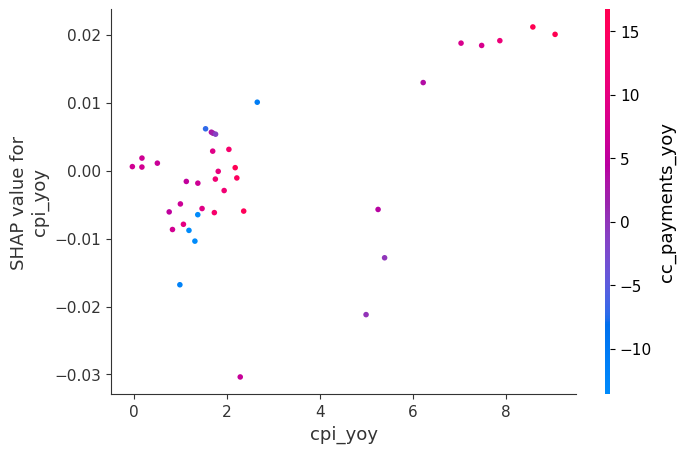

In [199]:
f = plt.figure()
shap.dependence_plot("cpi_yoy", shap_values, X_test) 
f.savefig("images/cpi_shap.png", bbox_inches='tight', dpi=600)

<Figure size 640x480 with 0 Axes>

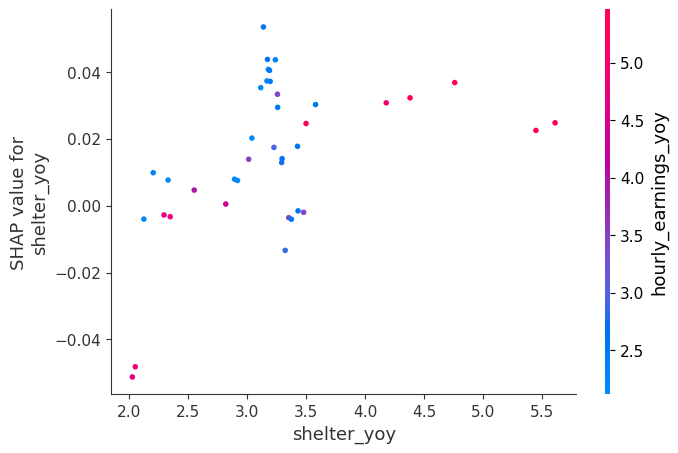

In [200]:
f = plt.figure()
shap.dependence_plot("shelter_yoy", shap_values, X_test) 
f.savefig("images/shelter_shap.png", bbox_inches='tight', dpi=600)

<Figure size 640x480 with 0 Axes>

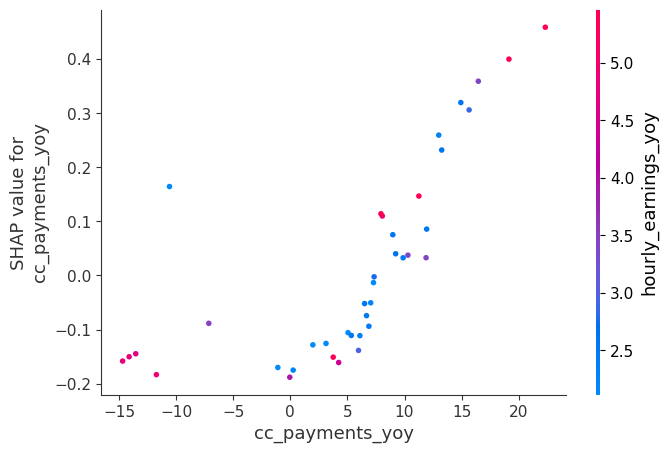

In [201]:
f = plt.figure()
shap.dependence_plot("cc_payments_yoy", shap_values, X_test) 
f.savefig("images/cc_payments_shap.png", bbox_inches='tight', dpi=600)

In [136]:
X_test.head(11)

,cpi_yoy,shelter_yoy,energy_yoy,medical_care_yoy,food_yoy,gasoline_yoy,new_&_used_vehicles_yoy,total_personal_savings,total_employee_compensation,population,wages_and_salaries_all,social_security,personal_interest_income,mortgage_rate_30_yr,tax_other_to_government,Mortgage_servicing_yoy,cc_payments_yoy
229,7.871064,4.757652,25.550810,2.440749,7.897539,43.910256,23.533280,7.490670e+11,1.318627e+13,332972000.0,1.089432e+13,1.197699e+12,1.550787e+12,3.7625,1.259220e+11,46.014444,11.254668
154,0.501798,3.179172,-14.684643,2.916879,1.270025,-24.315899,-0.398746,7.705190e+11,9.811191e+12,323113000.0,7.953493e+12,8.802400e+11,1.371212e+12,3.9425,9.987700e+10,1.014004,6.090358
181,2.211795,3.137403,7.731779,1.788269,1.396755,12.005220,0.079426,8.851530e+11,1.077990e+13,328085000.0,8.759145e+12,9.580690e+11,1.508964e+12,4.3300,1.091170e+11,7.581300,14.930895
198,1.811465,3.478007,-2.032082,2.535621,1.784462,-3.376262,0.257246,1.099553e+12,1.140521e+13,330553000.0,9.284143e+12,1.031625e+12,1.604503e+12,3.7650,1.149990e+11,-14.139328,10.296540
211,1.309645,2.295514,-9.040548,4.400747,4.128710,-18.003766,1.593746,2.433284e+12,1.157726e+13,331885000.0,9.444660e+12,1.081309e+12,1.492704e+12,2.9350,1.086980e+11,-14.705395,-14.692985
161,0.997326,3.426356,-9.429460,3.531020,0.325118,-16.560734,-0.778836,6.823270e+11,9.929757e+12,324476000.0,8.060227e+12,8.929470e+11,1.379291e+12,3.5680,1.015860e+11,-9.431852,6.501456
228,7.479872,4.379360,26.978706,2.507268,6.951406,46.732588,23.429045,7.410430e+11,1.311271e+13,332933000.0,1.082946e+13,1.195473e+12,1.538960e+12,3.4450,1.254020e+11,38.605349,7.934374
210,0.986082,2.348132,-11.158603,4.988041,4.099909,-21.613833,-0.254566,3.221314e+12,1.145594e+13,331811000.0,9.338495e+12,1.078039e+12,1.494489e+12,3.0160,1.080460e+11,-16.294622,-11.733778
225,6.221869,3.498717,29.970783,1.300314,5.328209,56.785549,16.326373,1.202395e+12,1.292299e+13,332708000.0,1.066153e+13,1.129100e+12,1.518041e+12,3.0675,1.235380e+11,17.798951,3.755497
150,0.169570,3.114906,-14.755319,2.544142,1.633105,-22.047894,0.504349,7.572900e+11,9.729551e+12,322186000.0,7.883998e+12,8.722680e+11,1.357284e+12,4.0460,9.915400e+10,-0.479646,7.279391


In [203]:
df.iloc[229]

Unnamed: 0.2             229
Unnamed: 0.1             229
Unnamed: 0               229
date              2022-02-01
year                    2022
                     ...    
Student Loan           1.589
Other                   0.47
Total                 16.154
credit_yoy_6m       7.349697
credit_yoy_12m      7.234624
Name: 229, Length: 95, dtype: object

In [204]:
df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'date', 'year', 'month',
       'population', 'unemployment_rate', 'hourly_earnings_yoy', 'cpi_yoy',
       'shelter_yoy', 'energy_yoy', 'medical_care_yoy', 'food_yoy',
       'gasoline_yoy', 'imports_yoy', 'new_&_used_vehicles_yoy',
       'all_less_food_&_shelter_yoy', 'total_personal_income',
       'total_employee_compensation', 'wages_and_salaries_all',
       'wages_salaries_private_employees',
       'wages_salaries_government_employees',
       'employer_contributions_for_employee_pension_and_insurance_funds',
       'employer_contributions_for_government_social_insurance',
       'rental_income_(capital_consumption_adjusted)',
       'personal_dividend_income', 'personal_interest_income',
       'total_gov_social_benefits', 'social_security', 'medicare', 'medicaid',
       'unemployment_insurance', 'veterans'_benefits',
       'total_disposible_personal_income_chained_2017',
       'total_personal_savings',
       'personal_

In [205]:
df.loc[229, 'cc_bals_30d_due_percentage_12m']

2.7466666666666666

In [206]:
X_test.iloc[0]

cpi_yoy                    7.871064
shelter_yoy                4.757652
medical_care_yoy           2.440749
food_yoy                   7.897539
gasoline_yoy              43.910256
hourly_earnings_yoy        5.289421
unemployment_rate          3.800000
Mortgage_servicing_yoy    46.014444
cc_payments_yoy           11.254668
Name: 229, dtype: float64

In [207]:
shap.initjs()

In [208]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

### Now doing Shap analysis on credit growth 

In [222]:
features = ['cpi_yoy', 'shelter_yoy', 'medical_care_yoy', 'food_yoy', 'gasoline_yoy', 'hourly_earnings_yoy', 'unemployment_rate', 'Mortgage_servicing_yoy', 'cc_payments_yoy']

X = df[:235][features]
y = df[:235]['credit_yoy_12m']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [223]:
df['credit_yoy_12m']

0      5.379730
1      5.124623
2      5.396815
3      4.830131
4      4.545574
         ...   
242         NaN
243         NaN
244         NaN
245         NaN
246         NaN
Name: credit_yoy_12m, Length: 247, dtype: float64

In [224]:
shap_values

array([[ 1.48052601e-02,  3.19884728e-02, -1.45314315e-02,
         8.27719590e-03,  2.39397843e-02, -6.22761204e-02,
         2.33171559e-03,  3.13828622e-02,  1.24811428e-01],
       [ 8.03791062e-04,  3.75624423e-02, -1.85532273e-02,
        -6.74355823e-03, -3.33537969e-03,  4.81130526e-02,
         6.89830450e-03,  9.15009152e-03, -1.08166350e-01],
       [-2.08324625e-03,  4.92340372e-02,  6.39491690e-03,
        -3.46670248e-04,  8.14205867e-03,  1.86741154e-02,
         2.57102676e-03,  1.24079478e-02,  3.26801647e-01],
       [-3.08837057e-03, -3.36942508e-04, -1.51388345e-02,
        -2.00114036e-02, -1.30130004e-02, -1.55736388e-02,
        -8.87059544e-03, -1.04993770e-01,  3.78890561e-02],
       [-6.80136513e-03, -2.11462638e-03,  1.42399278e-02,
        -2.19746143e-02, -1.64342962e-02, -2.51126910e-01,
         5.10986828e-02, -4.25101245e-02, -1.76847508e-01],
       [-1.26735059e-03,  3.94441077e-03,  4.04984148e-02,
         9.14364631e-02, -5.60574885e-03,  5.554828

In [225]:
#y_pred = model.predict(X_test)

explainer = shap.Explainer(model)

In [226]:
shap_values = explainer.shap_values(X_test)

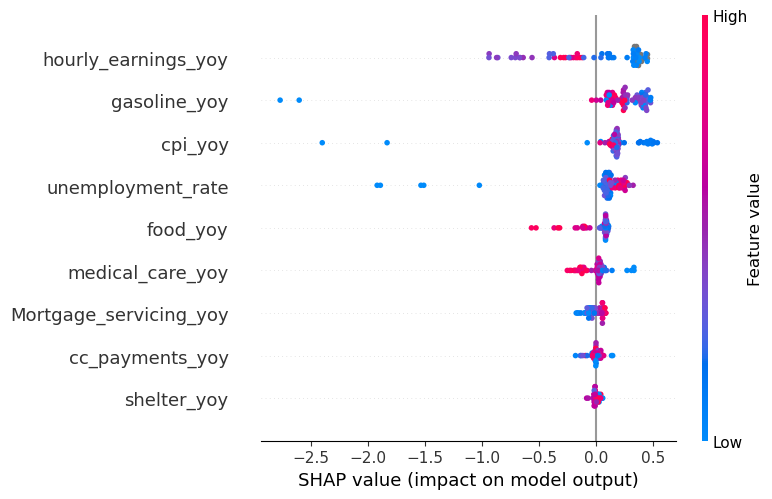

<Figure size 640x480 with 0 Axes>

In [227]:
shap.summary_plot(shap_values, X_test)
f = plt.figure()
f.savefig("images/credit_growth_shap.png", bbox_inches='tight', dpi=600)

<Figure size 640x480 with 0 Axes>

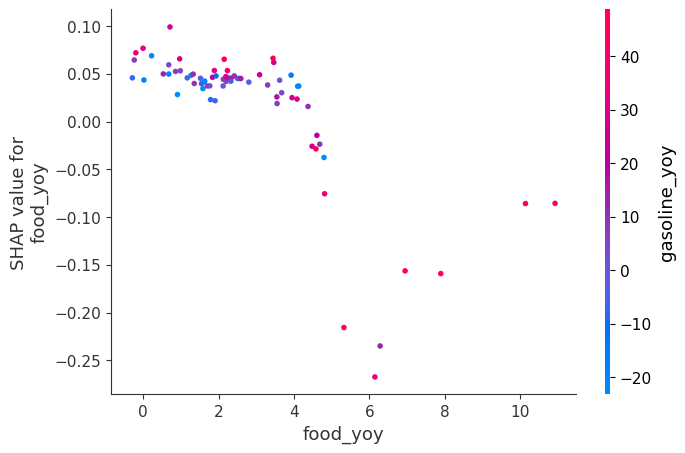

In [215]:
f = plt.figure()
shap.dependence_plot("food_yoy", shap_values, X_test) 
f.savefig("images/food_vs_credit_shap.png", bbox_inches='tight', dpi=600)